# Prosper Loans: An Exploration of Net Principal Loss
## Summer Cook

## Investigation Overview

> My goal was to better understand the interactions between poorly performing loans and other variables. Poor performance was measured by Net Principal Loss and by a Loan Status that is either "Defaulted or "Charged Off". I sought to find relationships between risk-related variables such as credit ratings, estimated loss, income, debt to income ratio and Prosper ratings and the chosen variables indicating poor loan performance. The following presentation will include visualizations involving only one variable of interest: Net Principal Loss. 

## Dataset Overview

> There are 81 columns and 113937 rows in the original data set. Each observation (row) is a loan and its associated variables that describe the loan and the borrower of the loan. I chose to exclude loans that were currently running at the time data collection stopped. I only looked at loans that have run their course to either completion or default/charge off. The final data set after current loans were removed was 43092 observations. The loans started in 2006 and ended in 2014.

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# load in the dataset into a pandas dataframe
df_completed = pd.read_csv('prosper_completed.csv')
df = pd.read_csv('prosperLoanData.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Net Principal Loss

> Loans resulting in loss show an approximately normal distribution with a logarithmic transformation. 
The majority of loans have a net principal loss of 0. 

Text(0.5, 1.0, 'Net Principle Loss')

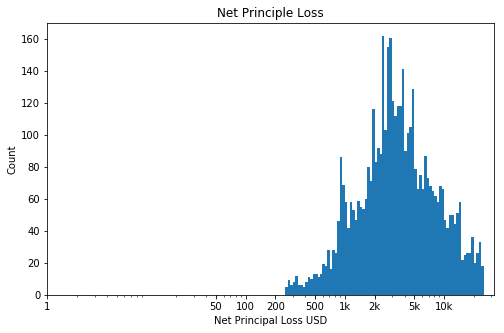

In [13]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_completed['LP_NetPrincipalLoss'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_completed, x = 'LP_NetPrincipalLoss', bins = bins)
plt.xlabel('Net Principal Loss USD')
plt.ylabel('Count')
plt.xscale('log')
plt.xticks([1, 50, 100, 200, 500, 1000, 2000, 5000, 10000], ['1','50', '100', '200', '500', '1k', '2k', '5k', '10k'])
plt.title('Net Principle Loss')

## Net Principal Loss vs. Previous Debt and Credit Scores

> As I expected, there is consistently a positive relationship between higher risk-related variables and loss. However, the correlations are weak and much weaker than I expected. The strongest relationship was only 0.81 with Prosper Prinicpal Outstanding (debt in Proper loans at the initiation of the new loan). Linear relationships were not discovered.

> Below can be seen graphs of previous Prosper Debt and Credit Scores. Observie the right side of the graphs, which represents loans with high losses. It is clear that high losses tend to be loans with lower risk variables. It appears that lender's with high risk variables are excluded from borrowing large sums, thereby preventing the relationship I looked for from developing.

Text(0.5, 1.0, 'Credit Score (r = -0.065)')

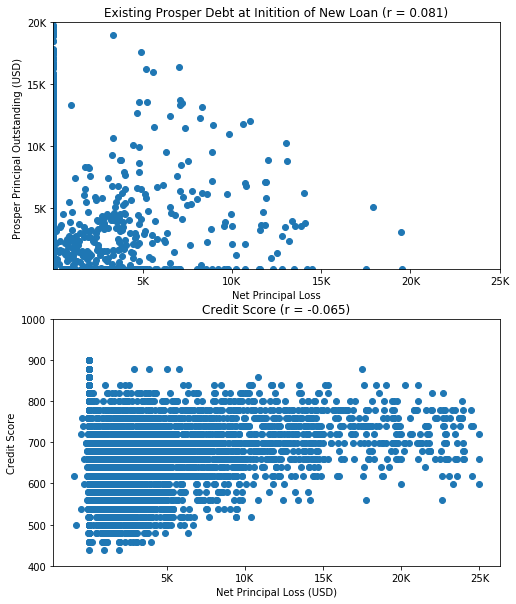

In [14]:


plt.figure(figsize = [8, 10])

plt.subplot(2, 1, 1)
plt.scatter(data = df_completed, y = 'ProsperPrincipalOutstanding', x = 'LP_NetPrincipalLoss')
plt.xlim([1,25000])
plt.ylim([1,20000])
plt.xticks([5e3, 10e3, 15e3, 2e4, 25e3], ['5K','10K', '15K', '20K', '25K'])
plt.yticks([5e3, 10e3, 15e3, 20e3], ['5K','10K', '15K', '20K'])

plt.xlabel('Net Principal Loss')
plt.ylabel('Prosper Principal Outstanding (USD) ')
plt.title('Existing Prosper Debt at Initition of New Loan (r = 0.081)')


plt.subplot(2,1,2)
plt.scatter(data = df_completed, y = 'CreditScoreRangeUpper', x = 'LP_NetPrincipalLoss')
plt.xlabel('Net Principal Loss')
plt.ylabel('CreditScoreRangeUpper')
plt.ylim([400,1000])
plt.xlabel('Net Principal Loss (USD)')
plt.ylabel('Credit Score')
plt.xticks([5e3, 10e3, 15e3, 2e4, 25e3], ['5K','10K', '15K', '20K', '25K'])
plt.title('Credit Score (r = -0.065)')



## Loss, Credit scores and Home Ownership

> Similarly, We can see that the high loss loans are populated mostly by home owners with higher credit scores. There is a high frequncy of loss among non-homeowners, but these are at low levels of loss. Data on the total principal of each loan is not provided, but it appears that loans for borrowers who do not own homes and have low credit scores are likely to be limited to smaller amounts than loans for lenders with homes and high credit scores. 

Text(0.5, 1.0, 'Credit Score vs Net Loss')

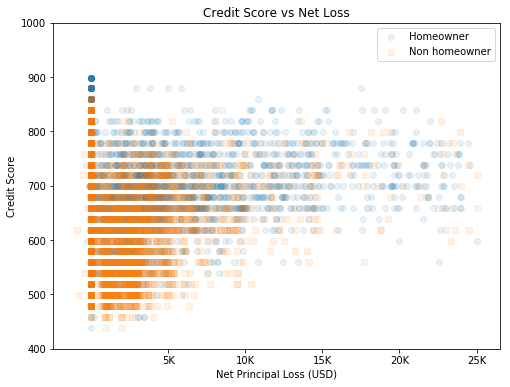

In [15]:
plt.figure(figsize = [8, 6])

cat_markers = [[True, 'o'],
               [False, 's']]

for cat, marker in cat_markers:
    df_cat = df_completed[df_completed['IsBorrowerHomeowner'] == cat]
    plt.scatter(data = df_cat, y = 'CreditScoreRangeUpper', x = 'LP_NetPrincipalLoss', marker = marker, alpha = 1/10)
plt.legend(['Homeowner','Non homeowner'])
plt.ylabel('Credit Score')
plt.xlabel('Net Principal Loss (USD)')
plt.ylim([400,1000])
plt.xticks([5e3, 10e3, 15e3, 2e4, 25e3], ['5K','10K', '15K', '20K', '25K'])
plt.title('Credit Score vs Net Loss')

## Prosper Ratings vs. Estimated Loss and Interest Rates.
> Another action taken by the lender to reduce risk is setting interest rates. Prosper rating is a measure of the risk associated with the borrower's economic status and previous behavior. There is a clear relationship between interest rates and Prosper rating. The lender estimates risk according to this rating and it sets interest rates accordingly, in order to help offset this risk.

Text(0.5, 1.0, 'Prosper Rating and Interest Rates')

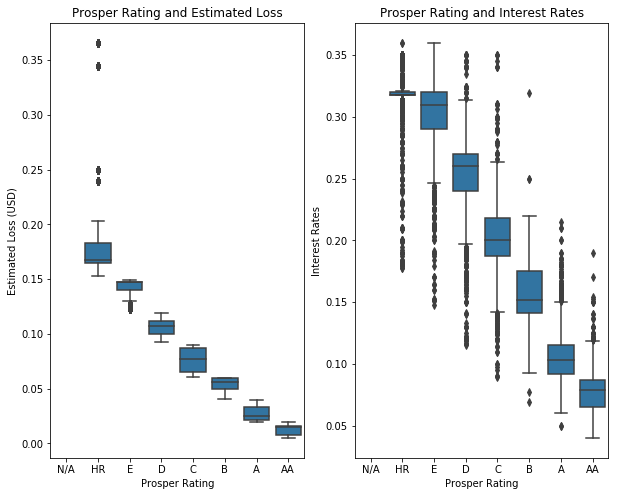

In [16]:

# ratings and Income ranges are ordered. 
ordinal_var_dict = {'ProsperRating(Alpha)': ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'], 
                    'IncomeRange': ['Not displayed', '$0','$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_completed[var] = df_completed[var].astype(ordered_var)

plt.figure(figsize = [10, 8])
base_color = sb.color_palette()[0]

# left plot: box plot
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data = df_completed , x= 'ProsperRating(Alpha)', y ='EstimatedLoss',color = base_color)
plt.ylabel('Estimated Loss (USD)')
plt.xlabel('Prosper Rating')
plt.title('Prosper Rating and Estimated Loss')

# # right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_completed, x = 'ProsperRating(Alpha)', y = 'BorrowerRate', color = base_color)
plt.ylabel('Interest Rates')
plt.xlabel('Prosper Rating')
plt.title('Prosper Rating and Interest Rates')


## Conclusion
> Interactions between Net Prinical Loss and risk-related variables are weak and linear relationships could not be found.

> I speculate that this is because the lender does well at using the information it gathers to prevent these relationships from being expressed among their loans.  Banks have an incentive to limit loss, so if they identify risky variables, it is in their best interest to avoid lending to borrowers in these categories, or limit the size of their loans.

